In [128]:
import matplotlib.pyplot as plt
%matplotlib inline
%run /Users/andreas/phys/master/GRB/src/paths/mac.ipynb
import pandas as pd


All MAC paths are set!


# Importing FEMRI cat data

# TODO:
    limmit the chi2/dof

In [123]:
# read in the txt file as a dataframe
df_fermiCat = pd.read_csv('/Users/andreas/phys/master/GRB/xspec/ModelPar_Analysis/FERMI_cat.txt', delimiter='|', skipinitialspace=True)

# clean up the column names
df_fermiCat.columns = df_fermiCat.columns.str.strip()

# remove any leading/trailing whitespace in the data
df_fermiCat = df_fermiCat.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# remove "flnc_band" from column names
df_fermiCat = df_fermiCat.rename(columns=lambda x: x.replace('flnc_band_', '') if 'flnc_band_' in x else x)

df_fermiCat = df_fermiCat.drop(columns=['Unnamed: 0', 'Unnamed: 6'])

#drop nan rows
df_fermiCat = df_fermiCat.dropna()

df_fermiCat = df_fermiCat.rename(columns={'name': 'GRB', 't90': 'T90', 'epeak': 'Epeak'})

# filtering short bursts T90<=2.0
df_fermiCatS = df_fermiCat[df_fermiCat['T90'] <= 2.0]

#filtering long bursts
df_fermiCatL = df_fermiCat[(df_fermiCat['T90'] > 2.0) & (df_fermiCat['T90'] < 100)]


#dropping outliers-->
# find index of row where alpha (Band) > 20 and epeak > 4000
drop_indexS = df_fermiCatS[(df_fermiCatS['alpha'] > 20)].index

# drop the row at drop_index
df_fermiCatS = df_fermiCatS.drop(drop_indexS)

# reset the index of the dataframe
df_fermiCatS = df_fermiCatS.reset_index(drop=True)

# Importing ASIM data

In [195]:
import re

# Read in the data and clean up the column names
df_modPar = pd.read_csv('/Users/andreas/phys/master/GRB/xspec/FERMI/modelPar.csv', header=0, index_col=0, sep='&')
df_modPar.columns = df_modPar.columns.str.strip()
df_modPar = df_modPar.drop(columns = ['chi2/dof','C_A','C_F'])


# Define a function to extract the three values from each parameter cell
def extract_values(cell):
    # Convert the cell to a string
    cell = str(cell)
    # Remove any special characters
    cell = re.sub(r'[\$\^_{}\\*]', '', cell)
    # Extract the three values
    values = re.findall(r'[-+]?[0-9]*\.?[0-9]+', cell)
    if len(values) == 3:
        value, upper, lower = map(float, values)
    else:
        lower = value = upper = float('nan')
    return lower, value, upper

param_cols = ['alpha','beta','Epeak']
# Loop over the parameter columns
for col in param_cols:
    # Create new columns for lower, value, and upper
    df_modPar[col+'_lower'] = np.nan
    df_modPar[col+'_value'] = np.nan
    df_modPar[col+'_upper'] = np.nan
    # Apply the extract_values function to each cell in the column
    for idx, cell in df_modPar[col].items():
        lower, value, upper = extract_values(cell)
        df_modPar.at[idx, col+'_lower'] = lower
        df_modPar.at[idx, col+'_value'] = value
        df_modPar.at[idx, col+'_upper'] = upper
    # Remove the original parameter column
    df_modPar.drop(col, axis=1, inplace=True)
df_modPar

,Int,alpha_lower,alpha_value,alpha_upper,beta_lower,beta_value,beta_upper,Epeak_lower,Epeak_value,Epeak_upper
GRB,,,,,,,,,,
181222B,1,-0.028,-0.538,0.025,-0.143,-3.077,0.094,-9.0,365.0,10.0
181222B,2,-0.043,-0.118,0.045,-0.359,-4.145,0.292,-11.0,430.0,11.0
190206A,1,-0.085,-0.318,0.088,-0.544,-3.392,0.299,-102.0,1083.0,138.0
190305A,1,-0.063,-0.179,0.073,-0.143,-3.015,0.126,-22.0,435.0,20.0
190606A,1,-0.047,-1.020,0.047,-0.241,-2.120,0.154,-694.0,1672.0,905.0
200521A,1,-0.083,-0.392,0.087,-0.079,-2.200,0.089,-268.0,1411.0,156.0
200716C,1,-0.089,-0.537,0.099,-0.729,-2.830,0.300,-90.0,702.0,107.0
201227A$^{*}$,1,-0.067,-0.199,0.083,-0.896,-3.570,0.508,-68.0,948.0,52.0
210619B,1,-0.038,-0.733,0.047,-0.027,-2.217,0.028,-28.0,543.0,24.0


## Short cat statistics

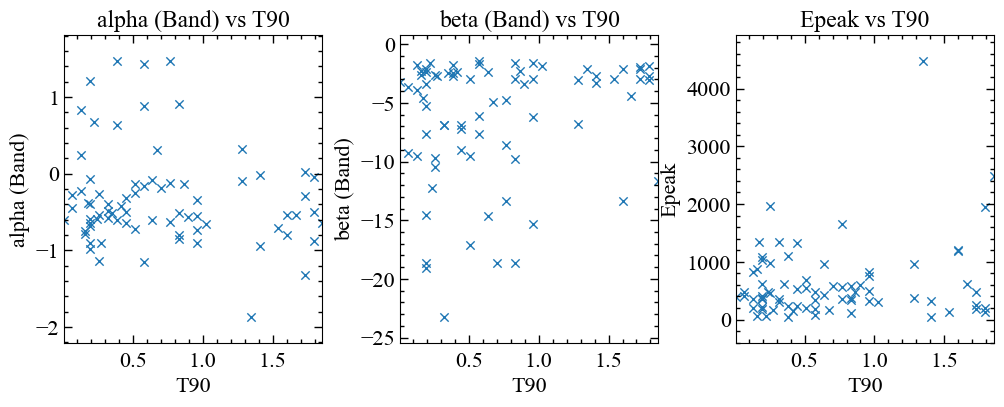

In [124]:
# create three scatter plots side by side
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(df_fermiCatS['T90'], df_fermiCatS['alpha'])
axs[1].scatter(df_fermiCatS['T90'], df_fermiCatS['beta'])
axs[2].scatter(df_fermiCatS['T90'], df_fermiCatS['Epeak'])

# add axis labels and a title to each plot
axs[0].set_xlabel('T90')
axs[0].set_ylabel('alpha (Band)')
axs[0].set_title('alpha (Band) vs T90')
axs[1].set_xlabel('T90')
axs[1].set_ylabel('beta (Band)')
axs[1].set_title('beta (Band) vs T90')
axs[2].set_xlabel('T90')
axs[2].set_ylabel('Epeak')
axs[2].set_title('Epeak vs T90')

# adjust spacing between plots and show the plot
plt.subplots_adjust(wspace=0.3)
plt.show()

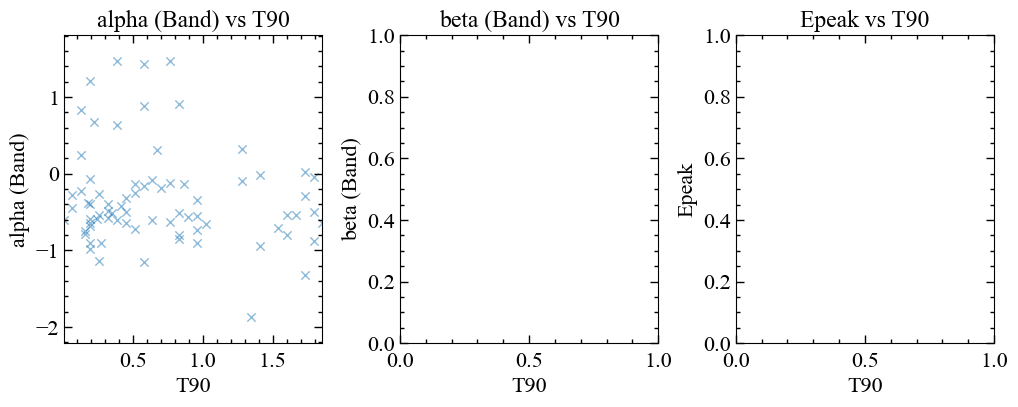

In [204]:
#TODO: estimate the T90 for our sample. Maybe this is in the catalogue for FERMI triggers and KW/GCN 

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot the original scatter plot
axs[0].scatter(df_fermiCatS['T90'], df_fermiCatS['alpha'], alpha=0.5)

# Plot the values in df_modPar as error bars
#axs[0].errorbar(df_modPar.index, df_modPar['alpha_value'], yerr=[df_modPar['alpha_value']-df_modPar['alpha_lower'], df_modPar['alpha_upper']-df_modPar['alpha_value']], fmt='o', alpha=0.5)

# add axis labels and a title to each plot
axs[0].set_xlabel('T90')
axs[0].set_ylabel('alpha (Band)')
axs[0].set_title('alpha (Band) vs T90')
axs[1].set_xlabel('T90')
axs[1].set_ylabel('beta (Band)')
axs[1].set_title('beta (Band) vs T90')
axs[2].set_xlabel('T90')
axs[2].set_ylabel('Epeak')
axs[2].set_title('Epeak vs T90')

# adjust spacing between plots and show the plot
plt.subplots_adjust(wspace=0.3)
plt.show()


In [125]:
alphaS = df_fermiCatS['alpha'].to_numpy(dtype=np.float32)
betaS = df_fermiCatS['beta'].to_numpy(dtype=np.float32)
epeakS = df_fermiCatS['Epeak'].to_numpy(dtype=np.float32)
print(f'\u03B1, mean: {alphaS.mean():.3g}, std: {alphaS.std():.3g}')
print(f'\u03B2, mean: {betaS.mean():.3g}, std: {betaS.std():.3g}')
print(f'Epeak, mean: {epeakS.mean():.3g}, std: {epeakS.std():.3g}')

α, mean: -0.327, std: 0.632
β, mean: -6.31, std: 5.29
Epeak, mean: 626, std: 657


In [107]:
corrS = df_fermiCatS[['T90', 'alpha', 'beta', 'Epeak']].corr()
print(corrS)


            T90     alpha      beta     Epeak
T90    1.000000 -0.125805  0.158742  0.130986
alpha -0.125805  1.000000 -0.064902 -0.321611
beta   0.158742 -0.064902  1.000000 -0.184678
Epeak  0.130986 -0.321611 -0.184678  1.000000


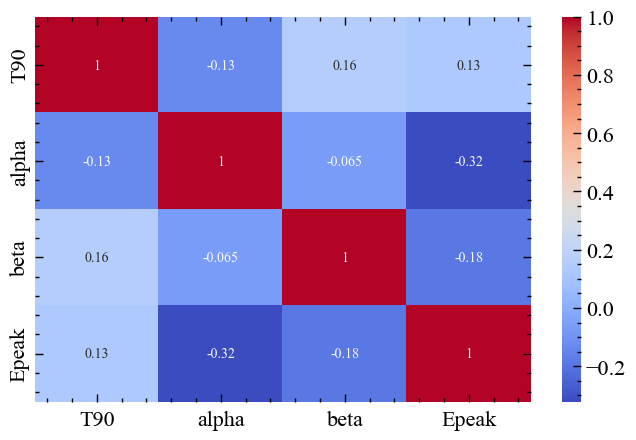

In [108]:
import seaborn as sns

sns.heatmap(corrS, annot=True, cmap='coolwarm')
plt.show()

The correlation coefficients in the correlation matrix reflect the linear relationship between each pair of variables. The values range from -1 to 1, with 1 indicating a perfect positive linear correlation (i.e., the variables increase or decrease together), -1 indicating a perfect negative linear correlation (i.e., one variable increases as the other decreases), and 0 indicating no linear correlation.

Looking at the correlation matrix for the variables 'T90', 'alpha', 'beta', and 'Epeak':

The correlation coefficient between T90 and alpha is -0.126, indicating a weak negative correlation. This suggests that there is a slight tendency for GRBs with longer durations (i.e., higher T90 values) to have slightly lower alpha (Band) values.

The correlation coefficient between T90 and beta is 0.159, indicating a weak positive correlation. This suggests that there is a slight tendency for GRBs with longer durations to have slightly higher beta (Band) values.

The correlation coefficient between T90 and Epeak is 0.131, indicating a weak positive correlation. This suggests that there is a slight tendency for GRBs with longer durations to have slightly higher Epeak values.

The correlation coefficient between alpha and beta is -0.065, indicating a very weak negative correlation. This suggests that there is almost no linear relationship between the values of alpha and beta.

The correlation coefficient between alpha and Epeak is -0.322, indicating a weak negative correlation. This suggests that there is a tendency for GRBs with lower alpha (Band) values to have slightly higher Epeak values.

The correlation coefficient between beta and Epeak is -0.185, indicating a weak negative correlation. This suggests that there is a tendency for GRBs with lower beta (Band) values to have slightly higher Epeak values.

Overall, the correlation coefficients suggest that there is no strong linear relationship between any of the variables. The weak correlations that do exist suggest only slight tendencies rather than strong relationships.

## Long cat statistics

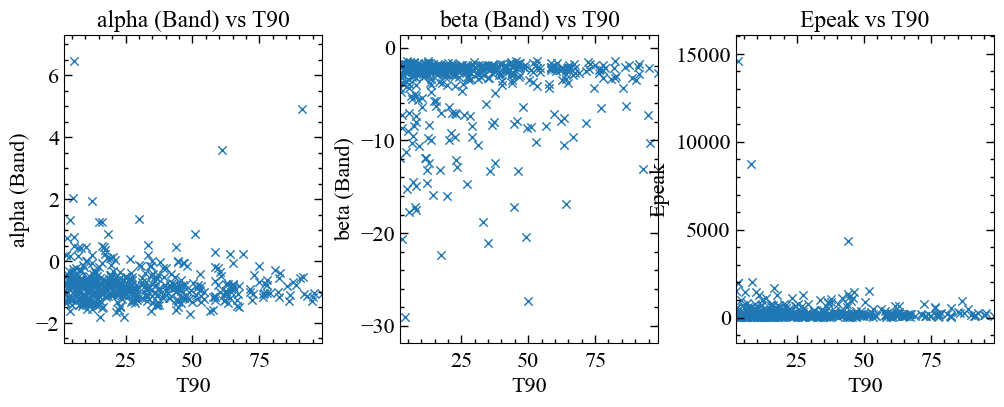

In [121]:
# create three scatter plots side by side
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(df_fermiCatL['T90'], df_fermiCatL['alpha'])
axs[1].scatter(df_fermiCatL['T90'], df_fermiCatL['beta'])
axs[2].scatter(df_fermiCatL['T90'], df_fermiCatL['Epeak'])

# add axis labels and a title to each plot
axs[0].set_xlabel('T90')
axs[0].set_ylabel('alpha (Band)')
axs[0].set_title('alpha (Band) vs T90')
axs[1].set_xlabel('T90')
axs[1].set_ylabel('beta (Band)')
axs[1].set_title('beta (Band) vs T90')
axs[2].set_xlabel('T90')
axs[2].set_ylabel('Epeak')
axs[2].set_title('Epeak vs T90')

# adjust spacing between plots and show the plot
plt.subplots_adjust(wspace=0.3)
plt.show()

In [122]:
alphaL = df_fermiCatL['alpha'].to_numpy(dtype=np.float32)
betaL = df_fermiCatL['beta'].to_numpy(dtype=np.float32)
epeakL = df_fermiCatL['Epeak'].to_numpy(dtype=np.float32)
print(f'\u03B1, mean: {alphaL.mean():.3g}, std: {alphaL.std():.3g}')
print(f'\u03B2, mean: {betaL.mean():.3g}, std: {betaL.std():.3g}')
print(f'Epeak, mean: {epeakL.mean():.3g}, std: {epeakL.std():.3g}')

α, mean: -0.733, std: 0.706
β, mean: -4.03, std: 3.97
Epeak, mean: 321, std: 854


            T90     alpha      beta     Epeak
T90    1.000000 -0.050809  0.041596 -0.075733
alpha -0.050809  1.000000  0.158860 -0.123260
beta   0.041596  0.158860  1.000000 -0.000865
Epeak -0.075733 -0.123260 -0.000865  1.000000


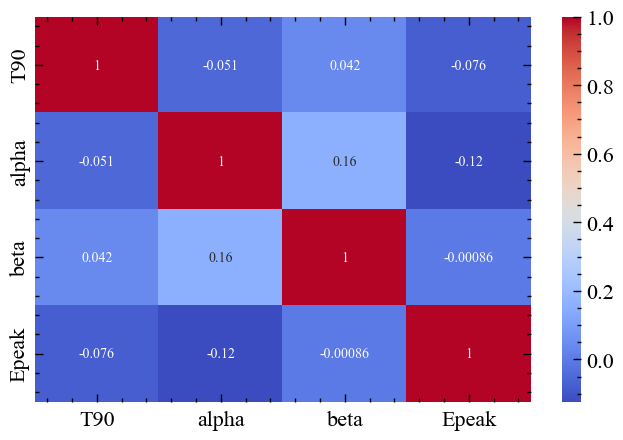

In [127]:
corrL = df_fermiCatL[['T90', 'alpha', 'beta', 'Epeak']].corr()
print(corrL)
sns.heatmap(corrL, annot=True, cmap='coolwarm')
plt.show()